<a href="https://colab.research.google.com/github/gyuholee94/NLP/blob/master/12_Prac_Topic_Modeling_LSA_%EC%97%B0%EC%8A%B5%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 토픽모델링 (Topic Modeling)

#0 환경

# 1 잠재의미분석 (Latent Semantic Analysis LSA)

## 1.1 직접 구현

###1) 직접 구현

In [28]:
import numpy as np
from collections import defaultdict
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import randomized_svd

class LSA:
    def __init__(self, doc_ls, topic_num):
        self.doc_ls = doc_ls
        self.topic_num = topic_num

        self.term2idx, self.idx2term = self.toIdxDict( ' '.join(doc_ls).split())
        self.doc2idx, self.idx2doc = self.toIdxDict(doc_ls)
    
        self.tdm = self.TDM(doc_ls)
        self.U, self.s, self.VT = self.SVD(self.tdm)

        self.term_doc_mat = self.TermDocVectorMatrix(self.U, self.s, self.VT, topic_num)

        self.term_mat = self.TermVectorMatrix(self.U, self.s, topic_num)
        self.doc_mat = self.DocVectorMatrix(self.s, self.VT, topic_num)
    # 리스트내 값을 index로 변환하는 dict과 
    # index를 리스트내 값으로 변환하는 dict
    def toIdxDict(self, ls):
      any2idx = defaultdict(lambda: len(any2idx))    
      idx2any = defaultdict()

      for item in ls:
        any2idx[item]
        idx2any[any2idx[item]] = item

      return any2idx, idx2any
    
    def TDM(self, doc_ls):
      tdm = np.zeros([len(self.term2idx), len(doc_ls)])
      for doc_idx, doc in enumerate(doc_ls):
        for term in doc.split():
          tdm[self.term2idx[term], doc_idx] += 1
      
      return tdm
        
    
    # 특이값 분해
    def SVD(self, tdm):
      U, s, VT = randomized_svd(tdm, n_components = 6, n_iter=20, random_state=None)
      return U, s, VT
    
    # 토픽별 주요 키워드 출력
    def TopicModeling(self, topic_num = 3):
      for i in range(topic_num):
        score = self.U[:, i:i+1].T
        sorted_index = np.argsort(-score)

        a=[]
        for j in sorted_index[0, : topic_num]:
          a.append((self.idx2term[j], score[0, j].round(3)))
        print('topic {} - {}'.format(i+1, a))
    
    def TermDocVectorMatrix(self, u, s, vt, topic_num):
      term_doc_mat = np.matrix(u[:, :topic_num]) * np.diag(s[:topic_num]) * np.matrix(vt[:topic_num, :])
      return term_doc_mat
        
    # 키워드를 입력했을 때 단어 벡터 반환
    def GetTermVector(self, term):
      vec = self.term_mat[self.term2idx[term]]
      print('{} = {}'.format(term, vec))
      return vec
        
            
    # 문서를 입력했을 때 문서 벡터 반환
    def GetDocVector(self, doc):
      vec = self.doc_mat[self.doc2idx[doc]]
      print('{} = {}'.format(doc, vec))
      return vec
    
   
    
    def TermVectorMatrix(self, u, s, topic_num):
      term_mat = np.matrix(u[:, :topic_num])
      return term_mat
        
    def DocVectorMatrix(self, s, vt, topic_num):
      doc_mat = np.matrix(vt[:topic_num, :].T)
      return doc_mat
      
        
    def GetTermSimilarity(self, term1, term2):
      pass
        
    def GetDocSimilarity(self, doc1, doc2):
      pass
    
    def Compression(self, round_num=0):        
      pass
        
        
    

In [29]:
doc_ls = ['바나나 사과 포도 포도 짜장면',
         '사과 포도',
         '포도 바나나',
         '짜장면 짬뽕 탕수육',
         '볶음밥 탕수육',
         '짜장면 짬뽕',
         '라면 스시',
         '스시 짜장면',
         '가츠동 스시 소바',
         '된장찌개 김치찌개 김치',
         '김치 된장 짜장면',
         '비빔밥 김치'
         ]

# doc_ls = ['배 타다 기차',
#           '배 타다 자동차',
#           '배 먹다 사과',
#           '배 먹다 바나나',
#           '먹다 딸기']

lsa = LSA(doc_ls, 3)
X = lsa.TDM(doc_ls)
print(X)
lsa.TopicModeling(3)
print(lsa.term_doc_mat.round(0))


print('== 토픽 모델링 ==')
lsa.TopicModeling(3)
print('\n== 단어 벡터 ==')
lsa.GetTermVector('사과')
lsa.GetTermVector('포도')
print('\n== 단어 유사도 ==')
lsa.GetTermSimilarity('사과','바나나')
lsa.GetTermSimilarity('사과','짜장면')
lsa.GetTermSimilarity('포도','짜장면')
lsa.GetTermSimilarity('사과','스시')
print('\n== 문서 벡터 ==')
lsa.GetDocVector('사과 포도')
lsa.GetDocVector('짜장면 짬뽕')
print('\n== 문서 유사도 ==')
lsa.GetDocSimilarity('사과 포도', '포도 바나나')
lsa.GetDocSimilarity('사과 포도', '라면 스시')
print('\n== 토픽 차원수로 압축 ==')
lsa.Compression(0)

[[1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [2. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
topic 1 - [('포도', 0.697), ('짜장면', 0.486), ('바나나', 0.348)]
topic 2 - [('짜장면', 0.584), ('짬뽕', 0.356), ('김치', 0.337)]
topic 3 - [('김치', 0.611), ('된장찌개', 0.264), ('김치찌개', 0.264)]
[[ 1.  0.  0.  0. -0.  0. -0.  0. -0. -0.  0. -0.]
 [ 1.  0.  0.  0. -0.  0. -0.  0. -0. -0.  0. -0.]
 [ 2.  1.  1.  0. -0.  0. -0.  0. -0. -0.  0. -0.]
 [ 1.  0.  0.  1.  0.  1.  0.  1.  0.  0.  1.  

### 2) 실습 템플릿

In [ ]:
class LSA :
  def __init__(self, doc_ls, topic_num):
    pass
  
  # tdm matrix 생성
  def TDM(self, doc_ls):
    pass
  
  # tdm matrix 특이값 분해(SVD)
  # U, s, Vt로 분해
  def SVD(self, tdm):
    pass
  
  # 토픽별 주요 키워드 출력
  def TopicModeling(self) :
    pass
  
  
  # 단어 벡터 행렬 생성 dot(U,s)  
  def TermVectorMatrix(self, u, s):
    pass
  
  # 문서 벡터 행렬 생성 dot(s,Vt).T 
  def DocVectorMatrix(self, s, vt):
    pass
  
  # 키워드를 입력했을 때 단어 벡터 반환
  def GetTermVector(self, term):
    pass
  
  # 문서를 입력했을 때 문서 벡터 반환
  def GetDocVector(self, doc):
    pass
  
  # 단어-문서 벡터 행렬 생성
  def TermDocVectorMatrix(self, u, s, vt):
    pass
  
  # 단어 벡터 행렬에서 단어 간 코사인 유사도 측정하여 행렬형태로 반환
  def TermSimilarityMatrix(self, term_vec_matrix):
    pass
  
  # 두개 단어를 입력했을 때 코사인 유사도 반환
  def GetTermSimilarity(self, term1, term2):
    pass
  
  # 문서 벡터 행렬에서 문서 간 코사인 유사도 측정하여 행렬형태로 반환
  def DocSimilarityMartrix(self, doc_vec_matrix):
    pass
  
  # 두개 문서를 입력했을 때 코사인 유사도 반환
  def GetDocSimilarity(self, doc1, doc2):
    pass

In [ ]:
doc_ls = ['바나나 사과 포도 포도',
         '사과 포도',
         '포도 바나나',
         '짜장면 짬뽕 탕수욕',
         '볶음밥 탕수욕',
         '짜장면 짬뽕',
         '라면 스시',
         '스시',
         '가츠동 스시 소바',
         '된장찌개 김치찌개 김치',
         '김치 된장',
         '비빔밥 김치'
         ]

lsa = LSA(doc_ls, 3)
lsa.TopicModeling()
lsa.GetTermSimilarity('사과','바나나')
lsa.GetTermSimilarity('사과','짜장면')
lsa.GetDocSimilarity('사과 포도', '포도 바나나')
lsa.GetDocSimilarity('사과 포도', '라면 스시')

## 1.2 sklearn 활용

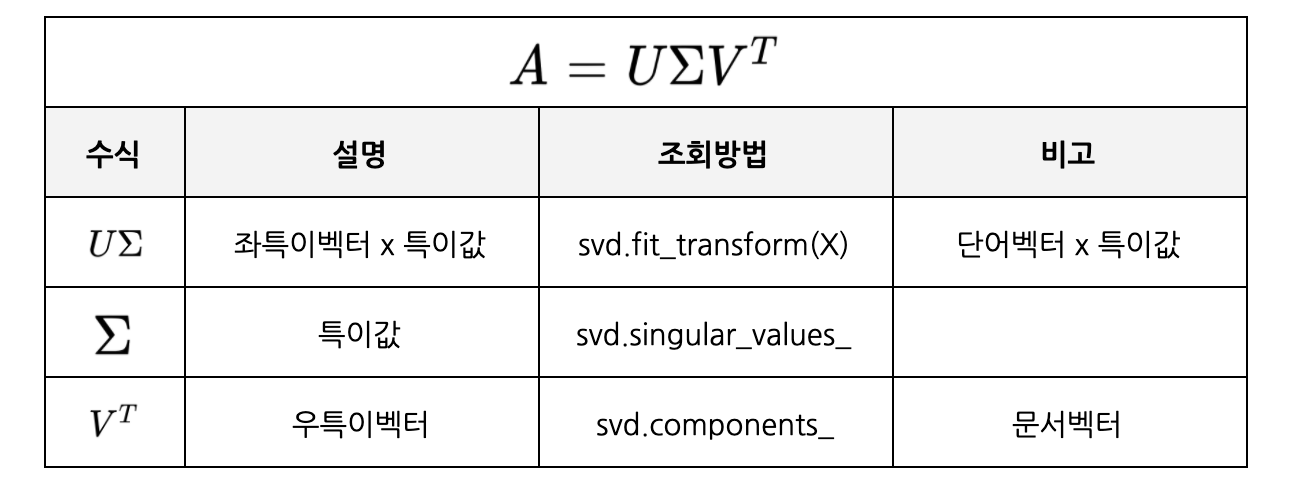

###1) 토픽모델링

In [ ]:
docs = ['바나나 사과 포도 포도 짜장면',
         '사과 포도',
         '포도 바나나',
         '짜장면 짬뽕 탕수육',
         '볶음밥 탕수육',
         '짜장면 짬뽕',
         '라면 스시',
         '스시 짜장면',
         '가츠동 스시 소바',
         '된장찌개 김치찌개 김치',
         '김치 된장 짜장면',
         '비빔밥 김치'
         ]

###2) 단어벡터

###3) 문서벡터

###4) 벡터 시각화

In [ ]:
from sklearn.manifold import TSNE
import numpy as np

def visualize_vectors(vectors, labels):
  tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=2)
  np.set_printoptions(suppress=True)
  T = tsne.fit_transform(vectors)
  #labels = vocab

  plt.figure(figsize=(10, 6))
  plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
  for label, x, y in zip(labels, T[:, 0], T[:, 1]):
      plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

In [ ]:
visualize_vectors(vectors, labels)

###5) 파이프라인 사용